In [1]:
import argparse
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('image', cmap='gray')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import os
from DeepVOG_torch import DeepVOG

In [27]:
model = DeepVOG().to(torch.device('cuda'))
model.load_state_dict(torch.load('DeepVOG_weights.pt'))

<All keys matched successfully>

(240, 320) 0.0 1.0


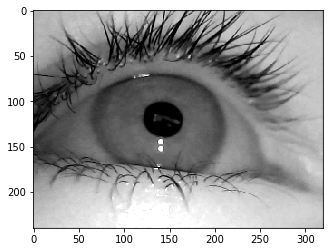

In [38]:
im = Image.open('test_image.png')
im = np.array(im)/255
print(im.shape, im.min(), im.max())
plt.imshow(im)
plt.show()

In [41]:
x = torch.Tensor(np.tile(im.reshape(1, 1, 240, 320), (1, 3, 1, 1))).to(torch.device('cuda'))
print(x.shape)

torch.Size([1, 3, 240, 320])


In [42]:
y = model(x)
im2 = y.detach().cpu().numpy().squeeze()

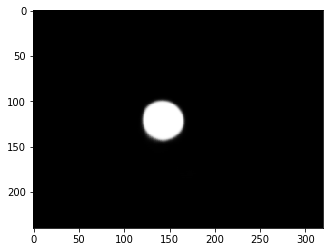

In [44]:
plt.imshow(im2[1, :, :].squeeze())
plt.show()

In [45]:
im3 = Image.fromarray(np.uint8(im2[1, :, :].squeeze()*255))
im3.save('test_prediction2.png')

In [12]:
l = nn.Conv2d(3, 2, 3, padding=1)

In [13]:
x = torch.ones((1, 1, 3, 4))

In [14]:
y = l(x.repeat((1, 3, 1, 1)))

In [15]:
y.detach().numpy()

array([[[[-0.19122212, -0.12908013, -0.12908013, -0.3384843 ],
         [-0.29823852, -0.49993414, -0.49993414, -0.9218929 ],
         [-0.31314737, -0.508094  , -0.508094  , -0.9109735 ]],

        [[ 0.08836544,  0.38043875,  0.38043875, -0.11921991],
         [ 0.3447193 ,  0.5411131 ,  0.5411131 ,  0.07722858],
         [ 0.2541625 ,  0.04314029,  0.04314029, -0.19596125]]]],
      dtype=float32)

In [24]:
l2 = nn.Conv2d(1, 2, 3, padding=1)
l2.weight = nn.Parameter(l.weight.sum(1).view(2, 1, 3, 3))
l2.bias = l.bias

In [25]:
y2 = l2(x)
y2.detach().numpy()

array([[[[-0.19122207, -0.1290801 , -0.1290801 , -0.33848423],
         [-0.29823852, -0.49993408, -0.49993408, -0.9218928 ],
         [-0.31314737, -0.50809395, -0.50809395, -0.9109734 ]],

        [[ 0.08836541,  0.38043877,  0.38043877, -0.11921994],
         [ 0.34471932,  0.5411132 ,  0.5411132 ,  0.07722865],
         [ 0.25416252,  0.04314035,  0.04314035, -0.19596118]]]],
      dtype=float32)